# Ratios of Sepals and Petals based on Length and Width
**Name:** Brandon Shellenberger<br>
**Date:** January 28, 2024<br>

In this project, I will demonstrate the use of jupyter notebooks while exploring a common dataset, *iris.csv*.
Near the end of this project, these are the questions will be answered:
 - Is there a correlation between petal lengths and petal widths?
 - Is there a correlation between sepal lengths and sepal widths?

### Importing External Libraries

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Loading the *iris.csv* Dataset
Loading the data as a DataFrame and printing the first 10 rows shows how the data is formatted.
There are 150 entries with 4 columns that are float values (numerical) and 1 column that is an object value (categorical). I am assuming all measurements are in milimeters (mm). All this is shown below.

In [23]:
# Load dataset into DataFrame
df = sns.load_dataset('iris')

# General inspection of dataset
print(df.head(10))
print(df.shape)
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### Inspecting the Data
This shows the descriptive statistics of the numerical columns and prints if there are any missing data points. Looking at the averages of each column, the sepal dimensions are slightly larger than the petal dimensions.

In [29]:
# Inspects statistics on each numerical column
print(f'{df.describe()}\n')

# looks for NaN values and prints a statement
if df.isnull().values.any() == False:
    print('There are zero NULL values in the dataset.')
else:
    print(f'There are {df.isnull().sum()} NULL values in the dataset.')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

There are zero NULL values in the dataset.


This histogram shows the number of each type of spceies. All three species have an equal amount in the dataset.

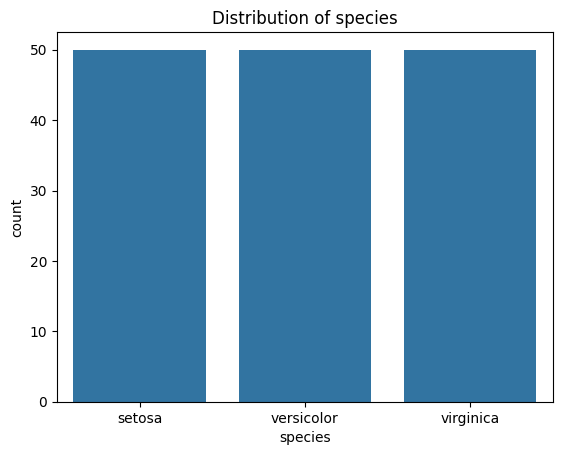

In [43]:
# Inspects value counts for one categorical column
df['species'].value_counts()

# Inspects value counts for all categorical columns
for col in df.select_dtypes(include=['object','category']).columns:
    # Displays count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')

plt.show()

#### Renaming columns

In [56]:
# Renaming column names
df.rename(columns={'sepal_length': 'Sepal Length',
                   'sepal_width': 'Sepal Width',
                   'petal_length': 'Petal Length',
                   'petal_width': 'Petal Width',
                   'species': 'Species'}, inplace=True)

### Further analysis
Below is a histogram for petal length and a histogram for all of the numerical columns.

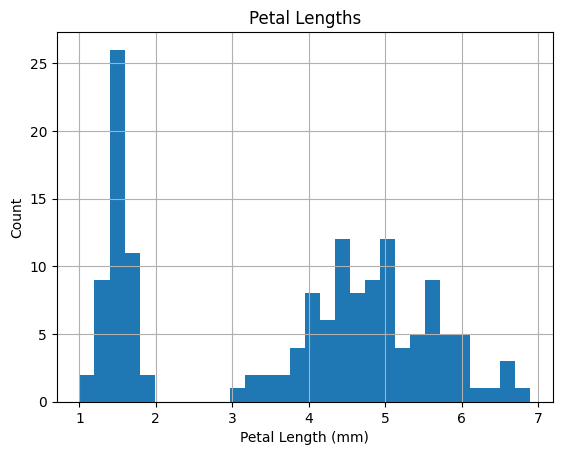

In [40]:
# Displays a histogram of one numerical column
df['Petal Length'].hist(bins= 30)
plt.title('Petal Lengths')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Count')

# Displays all the graphs above
plt.show()

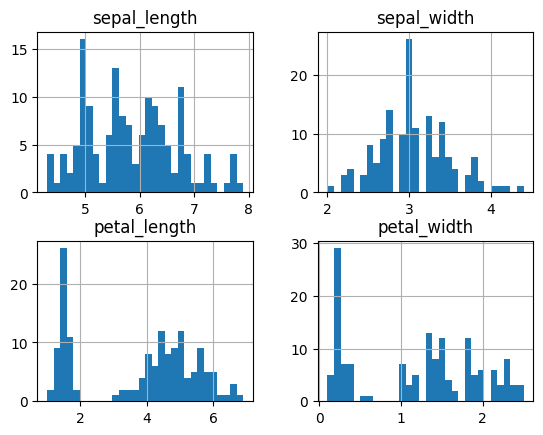

In [41]:
# Displays a histogram of all the numberical columns
df.hist(bins= 30)

plt.show()

It looks like there might be a correlation between petal length and petal width. But this might not be true for the sepal dimensions. We will answer the first question now.

-  #### Is there a correlation between petal lengths and petal widths?
This scatter plot shows the relationship between petal length and petal width. The correlation between the two measurements is shown as well.

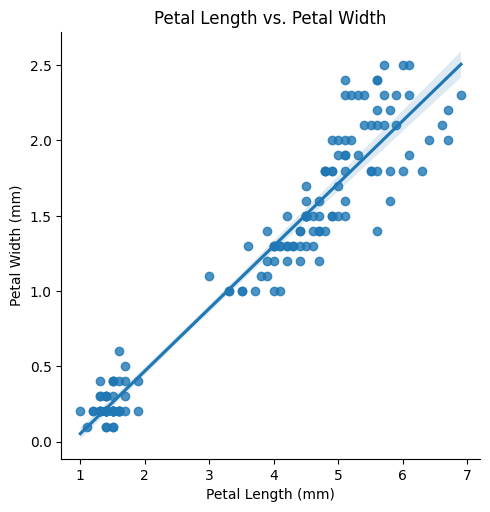

Correlation Coefificent between Petal Length and Petal Width: 0.9628654314027963


In [62]:
# scatter plot
sns.lmplot(data= df, x= 'Petal Length', y= 'Petal Width')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Petal Length vs. Petal Width')
plt.show()

# Showing Correlation
print(f'Correlation Coefificent between Petal Length and Petal Width: {df["Petal Length"].corr(df["Petal Width"])}')

There is a good positive correlation between the petal dimensions. But I am wondering about the grouping in the lower left corner. The next plot shows a simlar plot as above, but the different colors are the different species with the correlation coefficient for each species.

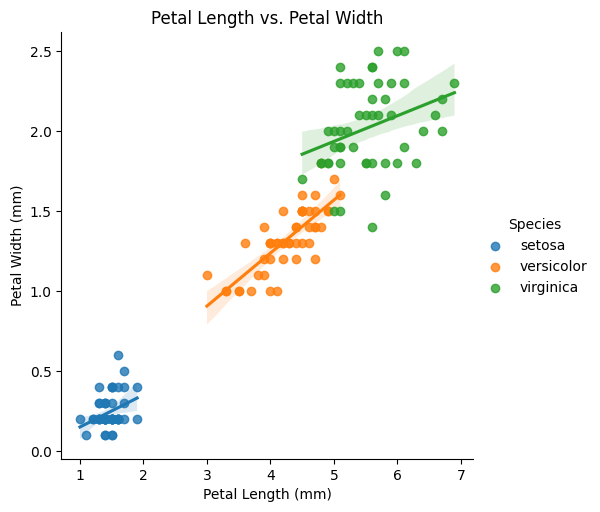

Petal Length  Petal Width
Species                                           
setosa     Petal Length      1.000000     0.331630
           Petal Width       0.331630     1.000000
versicolor Petal Length      1.000000     0.786668
           Petal Width       0.786668     1.000000
virginica  Petal Length      1.000000     0.322108
           Petal Width       0.322108     1.000000

In [76]:
# scatter plot with seperations in different colors
sns.lmplot(df, x= 'Petal Length', y= 'Petal Width', hue= 'Species')
plt.xlabel('Petal Length (mm)')
plt.ylabel('Petal Width (mm)')
plt.title('Petal Length vs. Petal Width')
plt.show()

# Correlation for each species
df.groupby('Species')[['Petal Length', 'Petal Width']].corr()

Looking at the graph, the lower left grouping is all the setosa species. The correlation of the setosa's are slightly positive, but more scattered which is expected. The virginica species has a similar correlation to the setosa's. The vericolor's have a stronger correlation is helping the overall correlation of the petal dimensions to exceed 0.95. Let's see if this analysis is similar to the sepal dimensions.

-  #### Is there a correlation between sepal lengths and sepal widths?

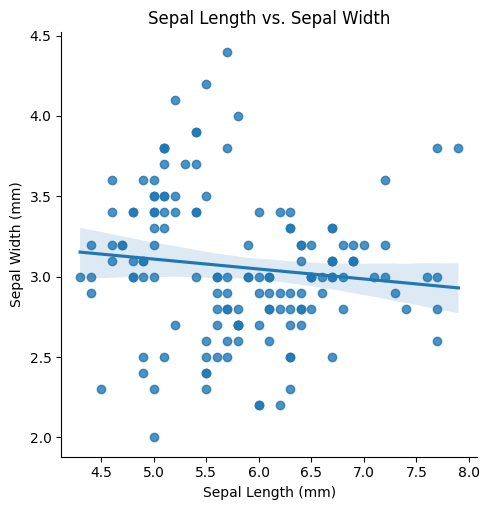

Correlation Coefificent between Petal Length and Petal Width: -0.11756978413300198


In [72]:
# scatter plot with seperations in different colors
sns.lmplot(df, x= 'Sepal Length', y= 'Sepal Width')
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# correlation coefficient
print(f'Correlation Coefificent between Petal Length and Petal Width: {df["Sepal Length"].corr(df["Sepal Width"])}')

At first glance, the datapoints hardly have any correlation to each other and the correlation coefficient proves this to be true. Just like the petals, the next graph will show the different species and their respective correlations.

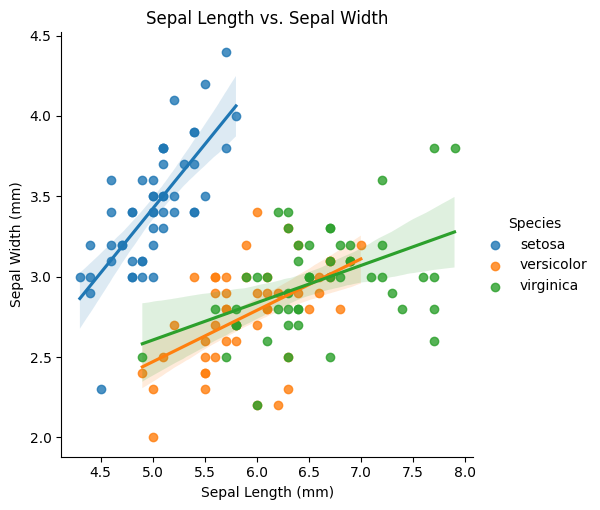

Sepal Length  Sepal Width
Species                                           
setosa     Sepal Length      1.000000     0.742547
           Sepal Width       0.742547     1.000000
versicolor Sepal Length      1.000000     0.525911
           Sepal Width       0.525911     1.000000
virginica  Sepal Length      1.000000     0.457228
           Sepal Width       0.457228     1.000000

In [75]:
# scatter plot with seperations in different colors
sns.lmplot(df, x= 'Sepal Length', y= 'Sepal Width', hue= 'Species')
plt.xlabel('Sepal Length (mm)')
plt.ylabel('Sepal Width (mm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

# Correlation for each species
df.groupby('Species')[['Sepal Length', 'Sepal Width']].corr()

All 3 species have a postive correlation with the setosa's showing a stronger correlation.

#### Conclusion
I originally thought that the dimensions of both the petals and sepals were going to have a very strong correlation. However, I found that the correlations are not as strong with some species having a correlation below 0.5. This tells me as the plant grows, the proportions of the petals and sepals will vary significantly.

## Ratios